In [14]:
import numpy as np
import pandas as pd
import networkx as nx
from webweb import Web

from src.load import load_basic_transfer_networks
from src.analyse import highest_in_degree

In [15]:
prem = load_basic_transfer_networks()
champ = load_basic_transfer_networks(league='english_championship') 

In [16]:
lcfc = 'leicester city'
champ_with_lcfc = {year: t for year, t in champ.items() if lcfc in t.league_clubs}
prem_with_lcfc = {year: t for year, t in prem.items() if lcfc in t.league_clubs}

In [17]:
champ_with_lcfc.keys()

dict_keys([2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013])

In [18]:
prem_with_lcfc.keys()

dict_keys([2000, 2001, 2003, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [60]:
all_with_lcfc = {**champ_with_lcfc, **prem_with_lcfc}
all_with_lcfc.keys()

dict_keys([2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2003, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [83]:
lcfc_degs = pd.DataFrame(columns=["in degree","out degree"])
year_range = range(2000, 2021)
for year in year_range:
    t = all_with_lcfc.get(year)
    if t is not None:
        out_degrees = {club: t.G.out_degree(club) for club in t.league_clubs}
        lcfc_degs.loc[year, "out degree"] = out_degrees[lcfc]
        in_degrees = {club: t.G.in_degree(club) for club in t.league_clubs}
        lcfc_degs.loc[year, "in degree"] = in_degrees[lcfc]
    else:
        lcfc_degs.loc[year, "out degree"] = None
        lcfc_degs.loc[year, "out degree"] = None

In [94]:
def get_degrees(tn_dict):
    degs = pd.DataFrame()
    for year in year_range:
        t = tn_dict.get(year)
        for club in t.league_clubs:
            degs.loc[year, f"{club} out degree"] = t.G.out_degree(club)
            degs.loc[year, f"{club} in degree"] = t.G.in_degree(club)
    return degs

In [95]:
prem_degs = get_degrees(prem)
prem_degs

,ipswich town out degree,ipswich town in degree,leicester city out degree,leicester city in degree,chelsea out degree,chelsea in degree,liverpool out degree,liverpool in degree,arsenal out degree,arsenal in degree,...,swansea city out degree,swansea city in degree,cardiff city out degree,cardiff city in degree,abournemouth out degree,abournemouth in degree,brighton & hove albion out degree,brighton & hove albion in degree,huddersfield town out degree,huddersfield town in degree
2000,12.0,10.0,18.0,18.0,22.0,21.0,16.0,17.0,18.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,14.0,19.0,15.0,17.0,14.0,8.0,13.0,8.0,15.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,13.0,9.0,18.0,12.0,19.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,28.0,27.0,24.0,24.0,17.0,17.0,23.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,23.0,21.0,22.0,20.0,21.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,20.0,17.0,29.0,26.0,22.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,21.0,19.0,28.0,27.0,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,20.0,19.0,25.0,26.0,19.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,25.0,19.0,24.0,24.0,12.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,19.0,18.0,22.0,17.0,17.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


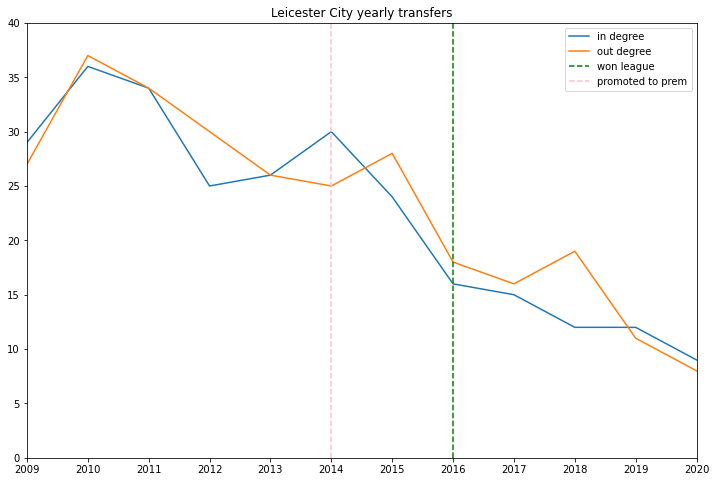

In [92]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(12, 8))
ax.plot(lcfc_degs["in degree"], label="in degree")
ax.plot(lcfc_degs["out degree"], label="out degree")
ax.set_xlim(2009, 2020)
ax.set_ylim(0, 40)
ax.set_xticks(range(2009, 2021))
ax.axvline(2016, linestyle='--', color='green', label='won league')
ax.axvline(2014, linestyle='--', color='pink', label='promoted to prem')
ax.legend()
ax.set_title('Leicester City yearly transfers')
plt.show()

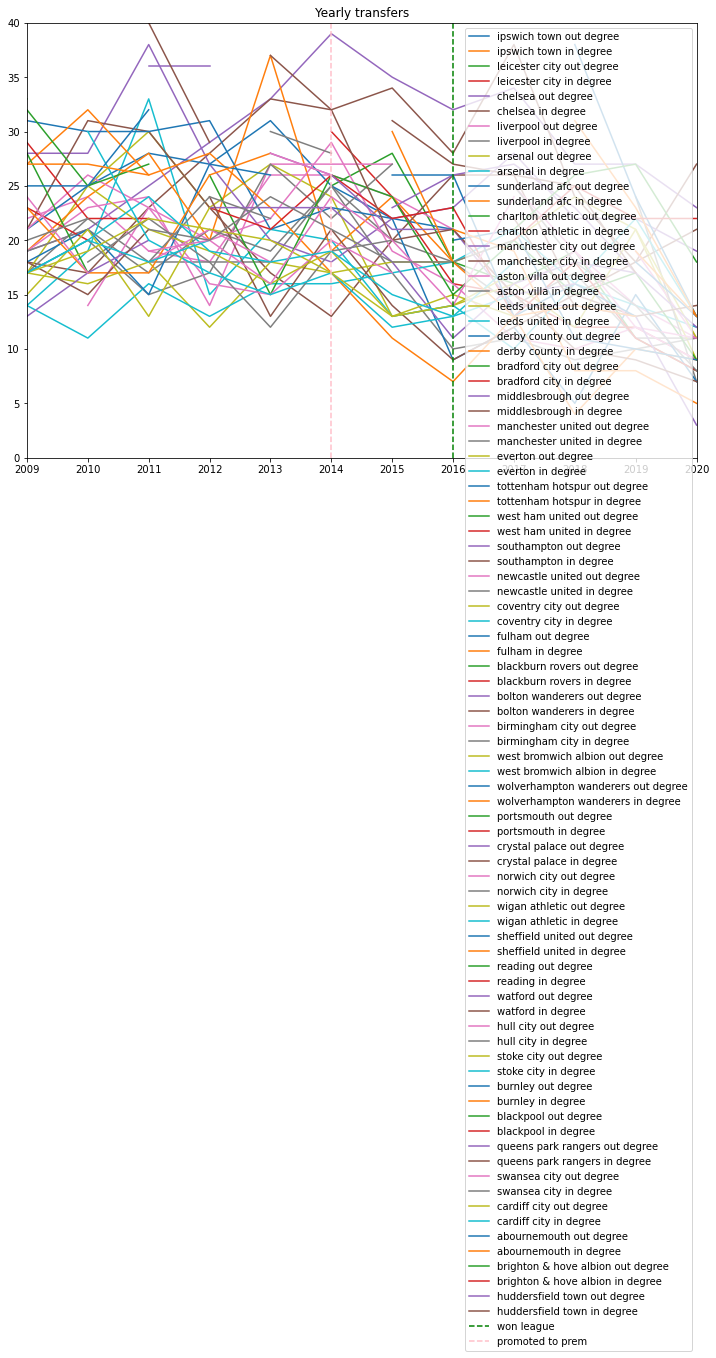

In [100]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
for col in prem_degs.columns:
    ax.plot(prem_degs[col], label=col)
ax.set_xlim(2009, 2020)
ax.set_ylim(0, 40)
ax.set_xticks(range(2009, 2021))
ax.axvline(2016, linestyle='--', color='green', label='won league')
ax.axvline(2014, linestyle='--', color='pink', label='promoted to prem')
ax.legend()
ax.set_title('Yearly transfers')
plt.show()

In [98]:
prem_degs.columns

Index(['ipswich town out degree', 'ipswich town in degree',
       'leicester city out degree', 'leicester city in degree',
       'chelsea out degree', 'chelsea in degree', 'liverpool out degree',
       'liverpool in degree', 'arsenal out degree', 'arsenal in degree',
       'sunderland afc out degree', 'sunderland afc in degree',
       'charlton athletic out degree', 'charlton athletic in degree',
       'manchester city out degree', 'manchester city in degree',
       'aston villa out degree', 'aston villa in degree',
       'leeds united out degree', 'leeds united in degree',
       'derby county out degree', 'derby county in degree',
       'bradford city out degree', 'bradford city in degree',
       'middlesbrough out degree', 'middlesbrough in degree',
       'manchester united out degree', 'manchester united in degree',
       'everton out degree', 'everton in degree',
       'tottenham hotspur out degree', 'tottenham hotspur in degree',
       'west ham united out degree', 